In [15]:
import nltk
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter

In [16]:
## url: https://www.imdb.com/title/tt0068646/reviews?ref_=tt_ql_3
## retrieve the reviews (requests, BeautifulSoup)
## load the file emotionWords.csv into a variable

url = "https://www.imdb.com/title/tt0068646/reviews?ref_=tt_ql_3"
response = requests.get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
reviews = html_soup.findAll('div', {"class": "text show-more__control"})

with open("../data/emotionWords.csv") as file:
    emotion_words = file.read()
emotion_words = emotion_words.split()

In [17]:
## apply tokenization and stemming to emotion words and reviews
## for the first 10 reviews:

tokens = []
for i in range(10):
    review = reviews[i]
    tokens += nltk.word_tokenize(review.getText())
tokens

["'The",
 'Godfather',
 "'",
 'is',
 'the',
 'pinnacle',
 'of',
 'flawless',
 'films',
 '!',
 'The',
 'first',
 'time',
 'I',
 'viewed',
 "'The",
 'Godfather',
 "'",
 'I',
 'was',
 'in',
 'my',
 'early',
 'teens',
 'and',
 'it',
 'was',
 'the',
 'most',
 'astounding',
 'film',
 'I',
 'had',
 'ever',
 'seen',
 ',',
 'and',
 'has',
 'since',
 'then',
 'stood',
 'as',
 'my',
 'all-time',
 'favourite',
 'film',
 '.',
 'It',
 'is',
 'due',
 'to',
 'this',
 'that',
 'I',
 'have',
 'been',
 'looking',
 'forward',
 'to',
 'writing',
 'a',
 'review',
 'of',
 'this',
 'unforgettable',
 'classic',
 '.',
 'So',
 'let',
 "'s",
 'start',
 'from',
 'the',
 'beginning',
 '.',
 'The',
 'film',
 'opens',
 'to',
 'four',
 'words',
 ',',
 "'",
 'I',
 'believe',
 'in',
 'America',
 "'",
 ',',
 'it',
 "'s",
 'crazy',
 'to',
 'think',
 'that',
 'this',
 'simple',
 'line',
 'has',
 'become',
 'a',
 'resonant',
 'quote',
 'solely',
 'due',
 'to',
 'the',
 'impact',
 'it',
 'made',
 'on',
 'the',
 'entrance',
 

In [18]:
#Stem all that should be compared with each other
porter = nltk.stem.porter.PorterStemmer()
tokens_stemmed = [porter.stem(tok) for tok in tokens]
emotion_words_stemmed = [porter.stem(emo) for emo in emotion_words]

In [19]:
## count the occurrences of each word from emotionWords in all the reviews
## plot a histogram for the occurrences of each word in all the reviews (such as the one below)

sameWord = []
for tok in tokens_stemmed:
    if tok in emotion_words_stemmed:
        sameWord.append(tok)

#count the occurrences of each emotion word that was found in the reviews
count = Counter(sameWord)

#get all original emotion words and set their count to 0
count_all = Counter(emotion_words_stemmed)
for elem in count_all:
    count_all[elem] = 0
#Create one dictionary with all the counts of all the occurrences, even the 0s 
count_all.update(count)

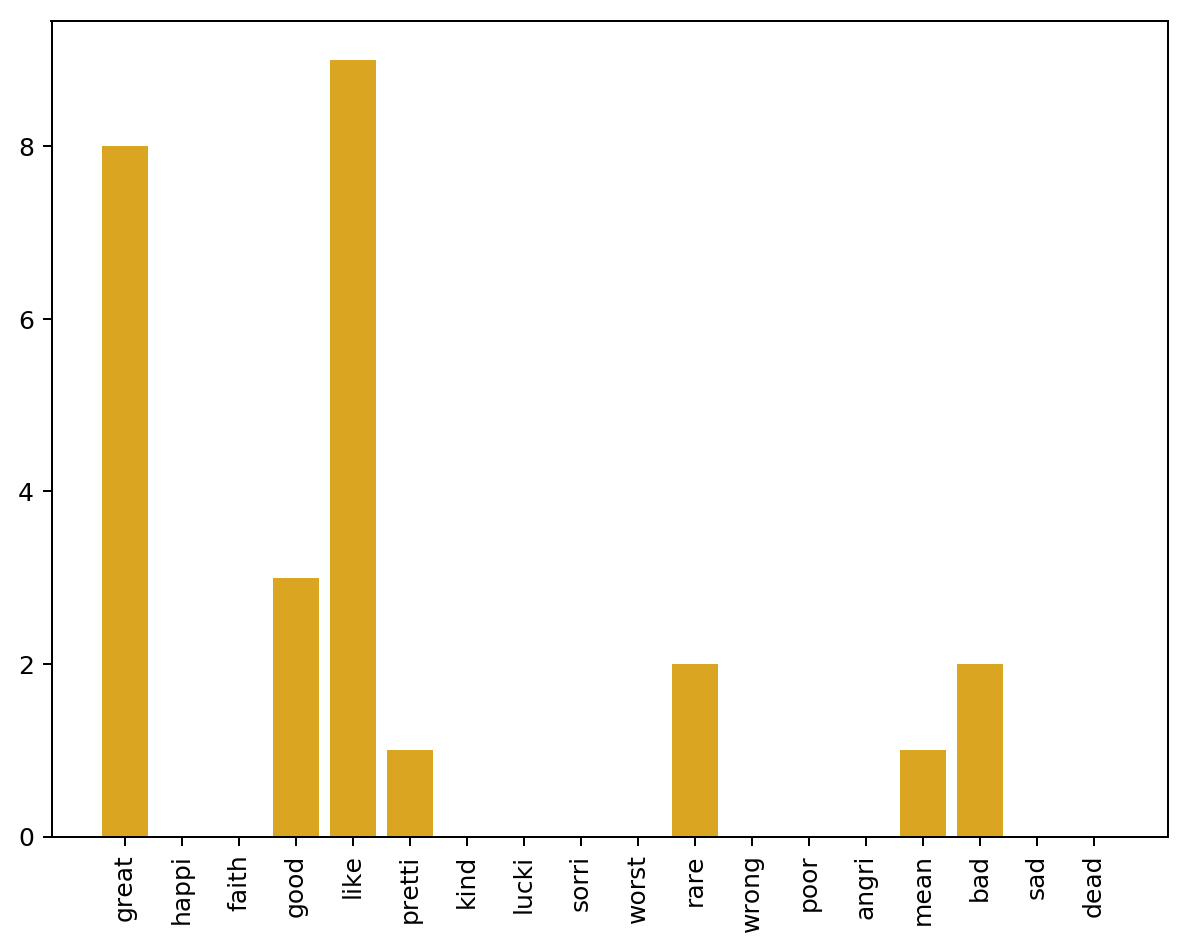

In [20]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='blue')
plt.bar(count_all.keys(),count_all.values(), color = "goldenrod")
plt.xticks( rotation='vertical')
plt.show()



